# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```

In [1]:
import sklearn
from matplotlib import pyplot as plt
from dt_helper import *
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
df = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
print('len of df is ', len(df))
#If you set drop = True , reset_index will delete the index instead of inserting it back into the columns of the DataFrame. If you set drop = True , the current index will be deleted entirely and the numeric index will replace it.
df = df.reset_index(drop=True)
df = df.fillna(0)
df.describe()

len of df is  699


,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## ===================================================

### Some very basic analysis

In [3]:
pd.Series({col:df[col].unique() for col in df})

CT                             [5, 3, 6, 4, 8, 1, 2, 7, 10, 9]
UCSize                         [1, 4, 8, 10, 2, 3, 7, 5, 6, 9]
UCShape                        [1, 4, 8, 10, 2, 3, 5, 6, 7, 9]
MA                             [1, 5, 3, 8, 10, 4, 6, 2, 9, 7]
SECSize                        [2, 7, 3, 1, 6, 4, 5, 8, 10, 9]
BN           [1.0, 10.0, 2.0, 4.0, 3.0, 9.0, 7.0, 0.0, 5.0,...
BC                             [3, 9, 1, 2, 4, 5, 7, 8, 6, 10]
NN                             [1, 2, 7, 4, 5, 3, 10, 6, 9, 8]
Mitoses                           [1, 5, 4, 2, 3, 7, 10, 8, 6]
Diagnosis                                               [2, 4]
dtype: object

In [4]:
df.isnull().sum()

CT           0
UCSize       0
UCShape      0
MA           0
SECSize      0
BN           0
BC           0
NN           0
Mitoses      0
Diagnosis    0
dtype: int64

In [5]:
len(df)

699

### Separating the features from the target variable

In [6]:
y=df['Diagnosis']
X=df.drop(['Diagnosis'], axis=1)

#### Making the relevant splits

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=383, stratify=y, test_size=0.20 )

#### Seeing the class distribution in both train and test sets

In [9]:
y_train.value_counts(normalize=True)

2    0.654741
4    0.345259
Name: Diagnosis, dtype: float64

In [10]:
y_test.value_counts(normalize=True)

2    0.657143
4    0.342857
Name: Diagnosis, dtype: float64

#### Just verifying the sizes of the various inputs

In [11]:
X_train.shape, y_train.shape

((559, 9), (559,))

In [12]:
X_test.shape, y_test.shape

((140, 9), (140,))

## =====================================================

## 1. a) Implement a decision tree (you can use decision tree implementation from existing libraries).
Here, I just implement a simple decision tree. The experiments with different values for various parameters is done later.

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt_model=DecisionTreeClassifier(random_state=5)

### Training a simple model

In [15]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

### Printing the various characteristics of the same model

In [16]:
dt_model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 5,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'presort': 'deprecated',
 'ccp_alpha': 0.0,
 'n_features_in_': 9,
 'n_features_': 9,
 'n_outputs_': 1,
 'classes_': array([2, 4]),
 'n_classes_': 2,
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x7f54696816c0>}

##### The accuracy score obtained on training set itself is 

In [17]:
dt_model.score(X_train, y_train)

1.0

##### The accuracy score obtained on TEST SET is

In [18]:
X_test

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses
579,1,1,1,1,2,1.0,3,1,1
381,10,6,3,6,4,10.0,7,8,4
490,1,1,1,1,2,1.0,1,1,1
111,8,6,4,3,5,9.0,3,1,1
140,3,1,1,1,2,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...
23,8,4,5,1,2,0.0,7,3,1
113,10,10,10,3,10,8.0,8,1,1
300,8,4,10,5,4,4.0,7,10,1
370,4,3,2,1,3,1.0,2,1,1


In [19]:
dt_model.score(X_test, y_test)

0.9357142857142857

In [20]:
exp_df=X_test.copy()
exp_df['real_world_class']=y_test
exp_df['predicted_class']=dt_model.predict(X_test)

#### Just showing the results

In [21]:
exp_df

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,real_world_class,predicted_class
579,1,1,1,1,2,1.0,3,1,1,2,2
381,10,6,3,6,4,10.0,7,8,4,4,4
490,1,1,1,1,2,1.0,1,1,1,2,2
111,8,6,4,3,5,9.0,3,1,1,4,4
140,3,1,1,1,2,1.0,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
23,8,4,5,1,2,0.0,7,3,1,4,4
113,10,10,10,3,10,8.0,8,1,1,4,4
300,8,4,10,5,4,4.0,7,10,1,4,2
370,4,3,2,1,3,1.0,2,1,1,2,2


#### ===============================================================

## 1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

## NOTE: For this, I will just use the default parameters of the DecisionTree from scikitLearn and just vary the IMPURITY MEASURING CRITERION, The other parameters have been varied in the next part.

In [22]:
def fetch_SIMPLE_train_and_val_scores(impurity_criterion):
    dt_model=DecisionTreeClassifier(
                                    criterion=impurity_criterion, 
                                    random_state=5)
    dt_model.fit(X_train, y_train)
    train_score=dt_model.score(X_train, y_train)
    valid_score=dt_model.score(X_test, y_test)
    return train_score, valid_score

In [23]:
domain_for_params={
    "impurity_criteria":["gini","entropy"]  
}

#### Showing the variation in parameters

In [24]:
for curr_key, curr_val in domain_for_params.items():
    print(f"{curr_key} : {curr_val}")

impurity_criteria : ['gini', 'entropy']


In [25]:
performance_dict={
    "impurity_criteria":[],
    "train_score":[],
    "test_score":[]
}

In [26]:
for curr_criteria in domain_for_params["impurity_criteria"]:             
    train_score, valid_score=fetch_SIMPLE_train_and_val_scores(
                                                        curr_criteria
                                                       )
    performance_dict["impurity_criteria"].append(curr_criteria)

    performance_dict["train_score"].append(train_score)
    performance_dict["test_score"].append(valid_score)

                
        

#### 1. c) Report the accuracies in each of the above splitting metrics and give the best result. 
## Ans:
From the below dataframe, we can see that keeping "entropy" as the metric seems to give slightly better accuracy than Gini as the metric. But, the difference is not very huge. Also, other parameters of the model are as default as in scikit learn.

In later parts of Q1, I further study this while mixing with other parameters as well.

In [27]:
pd.DataFrame(performance_dict)

,impurity_criteria,train_score,test_score
0,gini,1.0,0.935714
1,entropy,1.0,0.950000


## =============================================

## 1. d) Experiment with different approaches to decide when to terminate the tree (number of layers, purity measure, etc). Report and give explanations for all approaches. 

### Trying out diff models

In [28]:
def fetch_train_and_test_scores(max_depth_param, impurity_criterion, min_impurity_dec, max_features_considered):
    dt_model=DecisionTreeClassifier(max_depth=max_depth_param ,
                                    criterion=impurity_criterion, 
                                    min_impurity_decrease=min_impurity_dec,
                                    max_features=max_features_considered,
                                    random_state=1)
    #print(dt_model.__dict__)
    dt_model.fit(X_train, y_train)
    train_score=dt_model.score(X_train, y_train)
    test_score=dt_model.score(X_test, y_test)
    return train_score, test_score

## Describing some parameters and  their meanings

#### MAX DEPTH


#### Impurity criteria



#### MAX FEATURES


##### MIN IMPURITY DECREASE

In [29]:
domain_for_params={
    "max_depth":[x for x in range(2,12,5)],
    "impurity_criteria":["gini","entropy"],
    "max_features": [x for x in range(3,10,3)],
    "min_impurity_dec":[0,0.1]    
}

In [30]:
for curr_key, curr_val in domain_for_params.items():
    print(f"{curr_key} : {curr_val}")

max_depth : [2, 7]
impurity_criteria : ['gini', 'entropy']
max_features : [3, 6, 9]
min_impurity_dec : [0, 0.1]


In [31]:
performance_dict={
    "max_depth":[],
    "impurity_criteria":[],
    "max_features": [],
    "min_impurity_dec":[] ,
    "train_score":[],
    "test_score":[]
}

In [32]:
for curr_depth in domain_for_params['max_depth']:
    for curr_criteria in domain_for_params["impurity_criteria"]:
        for curr_max_features in domain_for_params["max_features"]:
            for curr_imp_dec_threshold in domain_for_params["min_impurity_dec"]:
                
                train_score, test_score=fetch_train_and_test_scores(curr_depth, 
                                                                    curr_criteria,
                                                                    curr_imp_dec_threshold,
                                                                    curr_max_features
                                                                   )
                performance_dict['max_depth'].append(curr_depth)
                performance_dict["impurity_criteria"].append(curr_criteria)
                #performance_dict["max_features"].append(curr_imp_dec_threshold)
                performance_dict["max_features"].append(curr_max_features)
                performance_dict["min_impurity_dec"].append(curr_imp_dec_threshold)
                performance_dict["train_score"].append(train_score)
                performance_dict["test_score"].append(test_score)
                
                
        

In [33]:
performance_df=pd.DataFrame(performance_dict)

#### Printing the results for the different combinations
- Max_depth: The maximum depth of the trees in the forest
- n_trees: The number of trees (estimators) for the forest
- n_features: The number of features that the trees should consider when looking for splits
- criterion: The tree specific criteria for measuring the quality of a split
- min_size: Minimum number of samples in the leaf nodes

### RESULTS
* BEST = entropy, max_depth = 7, max_features = 9 with SCORE OF 95%
* Scores can be seen in the table. It is clear than ENTROPY METRIC clearly works better than GINI for same set of parameters.
* But, we also notice that having more number of features considered at same level may not lead to better score.
* HAVING min impurity dec as zero helped to get better scores (comapred to 0.1)
* Allowing splitting at greater depth, also led to better results

In [34]:
performance_df = performance_df.sort_values(by=['test_score'], ascending=False, )

##### SORTED SUMMARY

In [35]:
performance_df

,max_depth,impurity_criteria,max_features,min_impurity_dec,train_score,test_score
22,7,entropy,9,0.0,0.994633,0.950000
18,7,entropy,3,0.0,0.987478,0.950000
14,7,gini,6,0.0,0.998211,0.942857
0,2,gini,3,0.0,0.940966,0.935714
4,2,gini,9,0.0,0.939177,0.935714
8,2,entropy,6,0.0,0.926655,0.928571
16,7,gini,9,0.0,0.998211,0.928571
12,7,gini,3,0.0,0.992844,0.928571
7,2,entropy,3,0.1,0.924866,0.921429
9,2,entropy,6,0.1,0.924866,0.921429


#### Speculation and analyzing results

Currently seeing performance during variation of the key:  max_depth


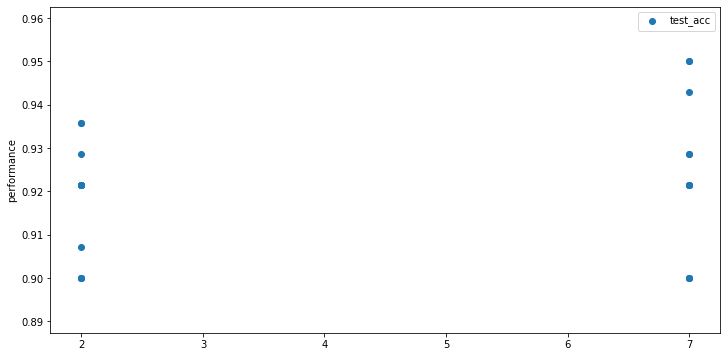


######################

Currently seeing performance during variation of the key:  impurity_criteria


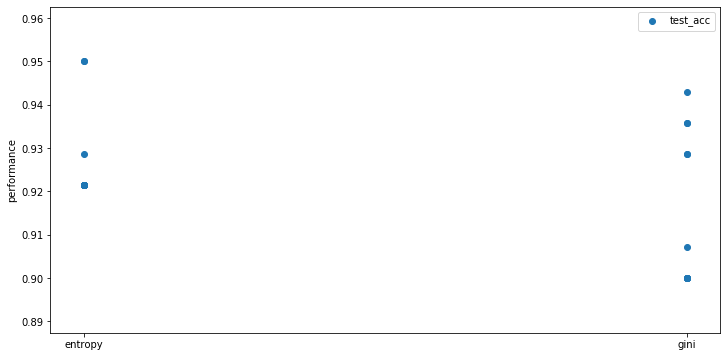


######################

Currently seeing performance during variation of the key:  max_features


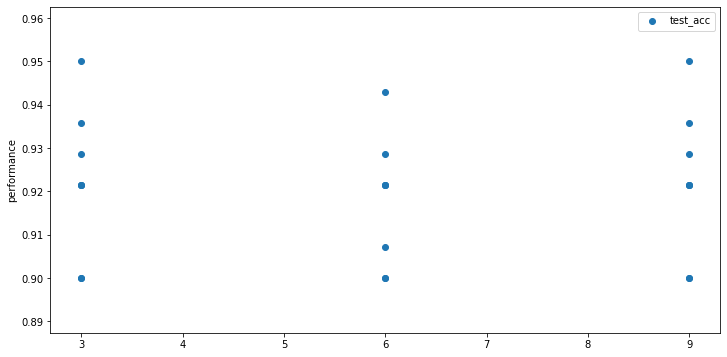


######################

Currently seeing performance during variation of the key:  min_impurity_dec


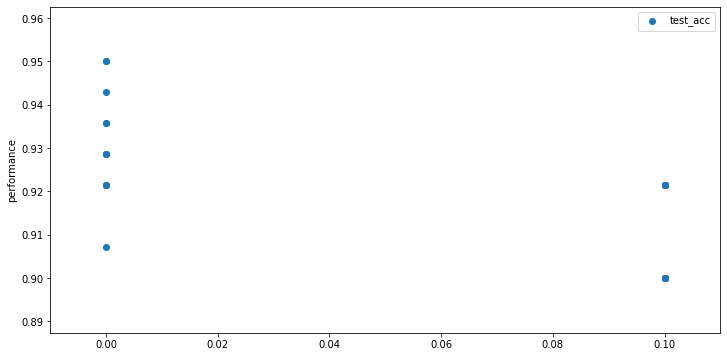


######################



In [36]:
for curr_key in domain_for_params.keys():
    print("Currently seeing performance during variation of the key: ",curr_key)
    plt.figure(figsize=(12,6))
    #plt.scatter(performance_df[curr_key], performance_df['train_score'], marker='o',label='train_acc')
    plt.scatter(performance_df[curr_key], performance_df['test_score'], marker='o',label='test_acc')
    plt.legend()

    plt.ylabel("performance")
    
    plt.show()
    print("\n######################\n")
    

## ===============================================

### 2. What is boosting, bagging and  stacking?
Which class does random forests belong to and why?

Answer:
### BAGGING
Bagging is used to reduce variance within a noisy dataset. Here, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once. After several data samples are generated, these weak models are then trained independently. For classification, the class selcted by majority of the individual models is chosen as the prediction of the bagged model.
Reduces variance, so has a strong beneficial effect on high variance classifiers.


### BOOSTING
HERE, a random partition of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of the previous model. With each iteration, the weak learnings from each individual MODEL are combined to FORM a strong learning rule.

### STACKING
Here, we use different machine learning models one after another,and add the predictions from each model to make a new feature. THis making of a new feature does not happen in boosting.
an entirely new model to trained to combine the contributions from each submodel and produce the best predictions.

### RANDOM FORESTS
A Random Forest is essentially nothing else but bagged decision trees, with a slightly modified splitting criteria. This is because each of the individual trees are independent and also, beacause we choose majority as the result.

## =========================================

### 3. Implement random forest algorithm using different decision trees . 


# NOTE: RANDOM FOREST HAS BEEN IMPLEMENTED IN DT_HELPER.py. I am importing the CLAS from there.

### VERSION 1:

In [37]:
rf_obj=RandomForestClass(50, "entropy",max_depth=5, min_samples_leaf=2, max_features=8)

In [38]:
rf_obj.fit_train_set(X_train, y_train)

In [39]:
y_rf=rf_obj.fetch_results(X_test)

In [40]:
y_test.iloc[0]

2

In [41]:
cnt=0
for idx, curr_elem in enumerate(y_rf):
    try:
        if curr_elem==y_test.iloc[idx]:
            cnt+=1
    except:
        print(curr_elem)
        print(y_test.iloc[idx])
        break

In [42]:
cnt/len(y_test)

0.9714285714285714

## VERSION 2

In [43]:
rf_obj=RandomForestClass(500, "entropy",max_depth=9, min_samples_leaf=2, max_features=9)
rf_obj.fit_train_set(X_train, y_train)
y_rf=rf_obj.fetch_results(X_test)

In [44]:
cnt=0
for idx, curr_elem in enumerate(y_rf):
    try:
        if curr_elem==y_test.iloc[idx]:
            cnt+=1
    except:
        print(curr_elem)
        print(y_test.iloc[idx])
        break

In [45]:
cnt/len(y_test)

0.9642857142857143

## SCORE:
* N_TREES=50, "entropy",max_depth=5, min_samples_leaf=2, max_features=8: 0.9714
* N_TREES=500, "entropy",max_depth=9, min_samples_leaf=2, max_features=9: 0.9642

### 4. Report the accuracies obtained after using the Random forest algorithm and compare it with the best accuracies obtained with the decision trees. 

### RESULTS:
Increasing n_trees does not increase accuracy necessarily.

Also, best accuracy in simple DECISION TREES was 95%.

Clearly, RANDOM FOREST both versions with scores of 96.4% and 97.1% beat simple decision trees.

### 5. Submit your solution as a separate pdf in the final zip file of your submission


Compute a decision tree with the goal to predict the food review based on its smell, taste and portion size.

(a) Compute the entropy of each rule in the first stage.

(b) Show the final decision tree. Clearly draw it.

Submit a handwritten response. Clearly show all the steps.



# IN PDF